<a href="https://colab.research.google.com/github/imharshmishra87/Feature-Scaling-Ml/blob/main/feature_scaling(standardization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standardization
 Transforms data points to have a mean of 0 and a standard deviation of 1, making it easier to compare features with different scales and improving performance in many machine learning models.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data=sns.load_dataset('iris')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Train Test And Split Of Data

In [6]:
x=data.iloc[:,:4]
y=data.iloc[:,-1:]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [8]:
x_train.shape

(135, 4)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [10]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)


In [11]:
np.round(x_train_scaled.describe(),1)


,sepal_length,sepal_width,petal_length,petal_width
count,135.0,135.0,135.0,135.0
mean,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0
min,-1.9,-2.0,-1.5,-1.4
25%,-0.9,-0.6,-1.2,-1.1
50%,-0.1,-0.2,0.3,0.2
75%,0.7,0.8,0.8,0.8
max,2.6,3.1,1.8,1.7


In [12]:
np.round(x_train.describe(),1)

,sepal_length,sepal_width,petal_length,petal_width
count,135.0,135.0,135.0,135.0
mean,5.8,3.1,3.7,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.2,1.0,0.1
25%,5.1,2.8,1.5,0.3
50%,5.7,3.0,4.2,1.3
75%,6.4,3.4,5.1,1.8
max,7.9,4.4,6.9,2.5


# Data Analysis Before And After Scaling(Standardization)

/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


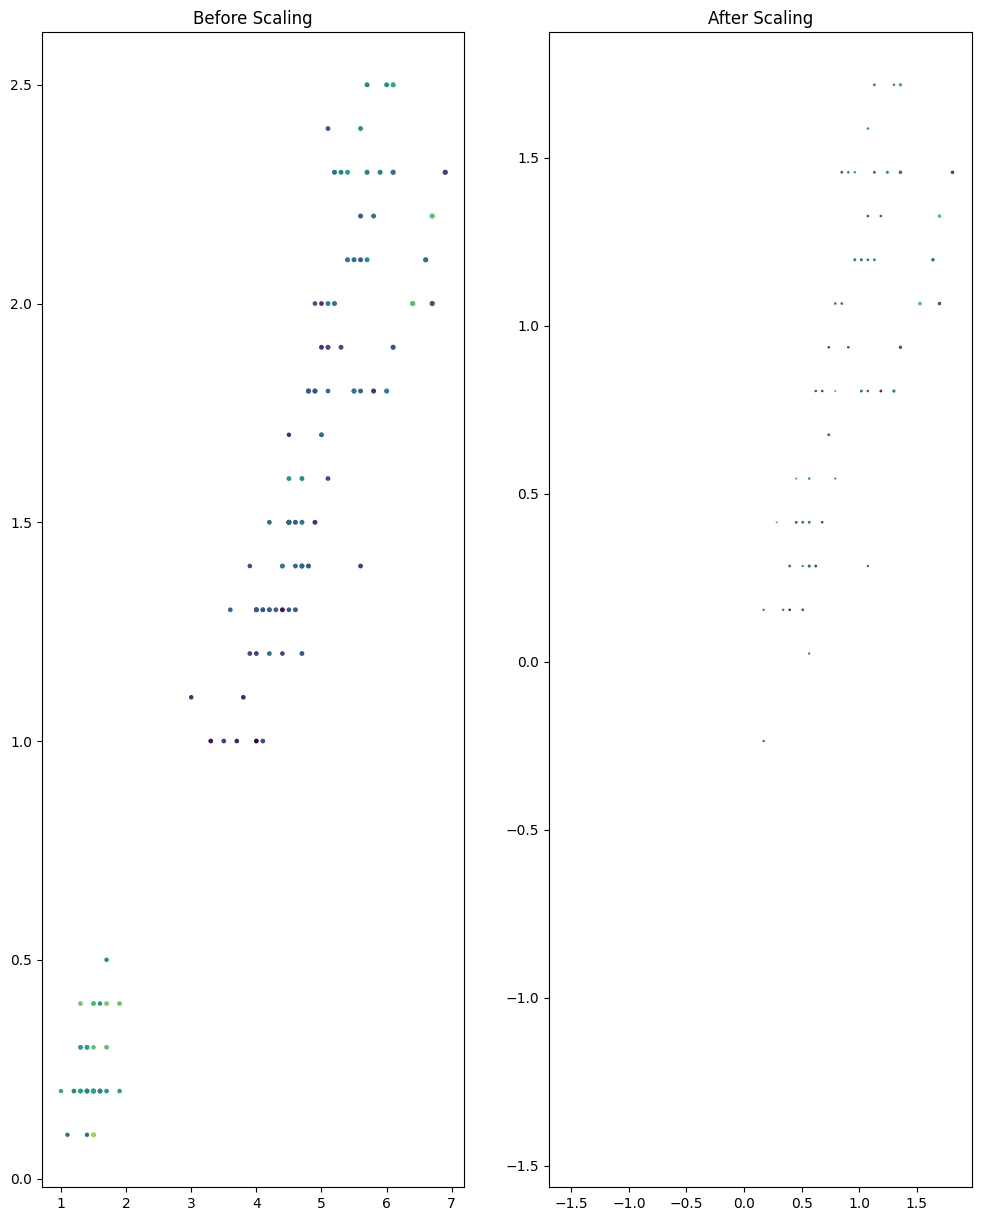

In [13]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,15))
ax1.scatter(x_train['petal_length'],x_train['petal_width'],x_train['sepal_length'],x_train['sepal_width'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['petal_length'],x_train_scaled['petal_width'],x_train_scaled['sepal_length'],x_train_scaled['sepal_width'])
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='data', ylabel='Density'>

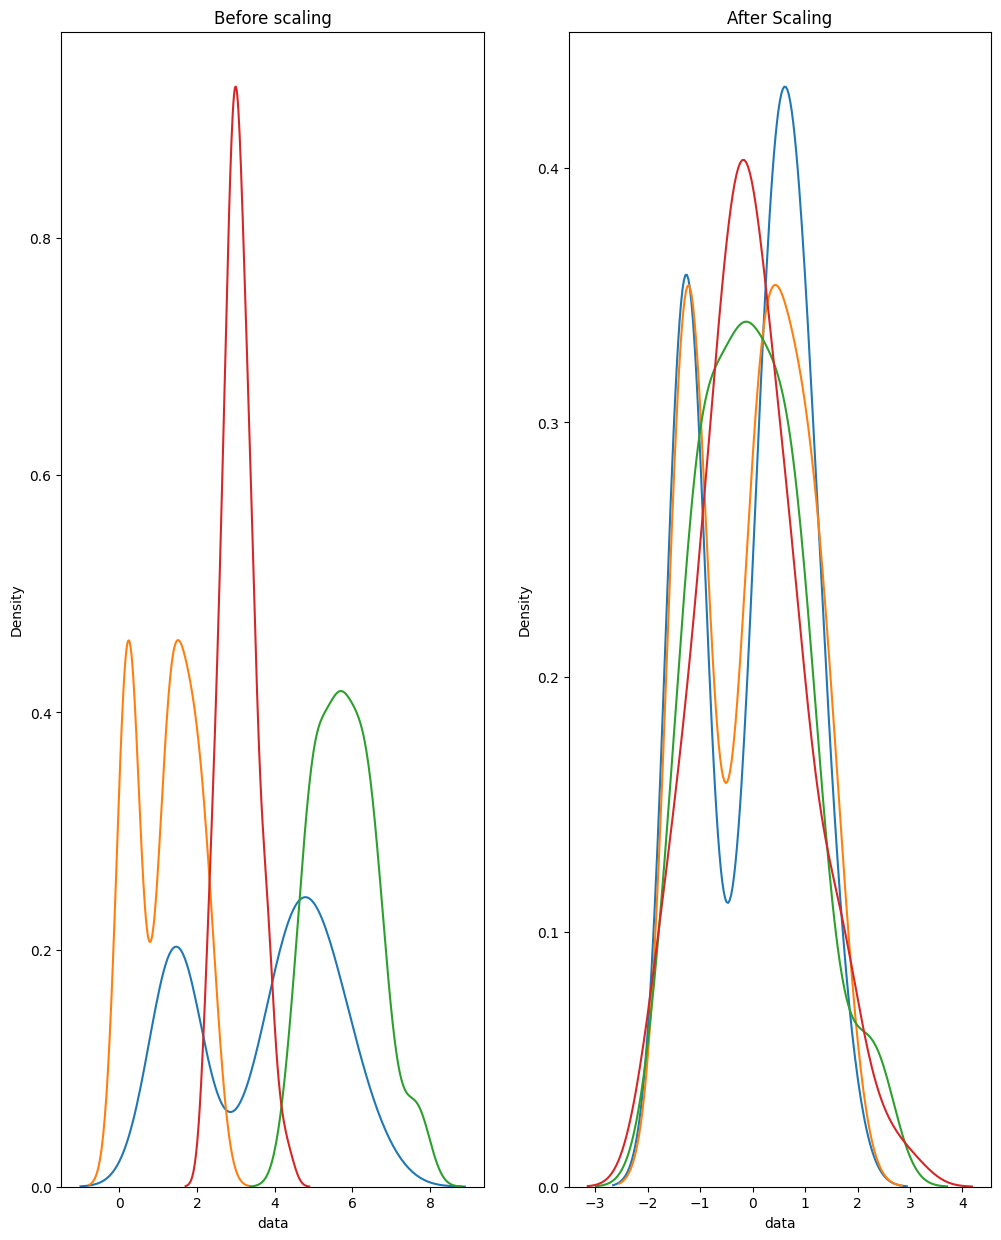

In [14]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,15))
ax1.set_title("Before scaling")
ax1.set_xlabel("data")
sns.kdeplot(x_train['petal_length'], ax=ax1)
sns.kdeplot(x_train['petal_width'], ax=ax1)
sns.kdeplot(x_train['sepal_length'], ax=ax1)
sns.kdeplot(x_train['sepal_width'], ax=ax1)

ax2.set_title("After Scaling")
ax2.set_xlabel("data")
sns.kdeplot(x_train_scaled['petal_length'], ax=ax2)
sns.kdeplot(x_train_scaled['petal_width'], ax=ax2)
sns.kdeplot(x_train_scaled['sepal_length'], ax=ax2)
sns.kdeplot(x_train_scaled['sepal_width'], ax=ax2)

# Training The Data Using Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model=LogisticRegression()

In [19]:
model.fit(x_train,y_train)
model.fit(x_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Prediction Of The Model

In [26]:
y_predict=model.predict(x_test)
y_predict_scaled=model.predict(x_test_scaled)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

# Testing The Accuracy Of The Model

In [40]:
from sklearn.metrics import accuracy_score
print("Without Scaling :",accuracy_score(y_test,y_predict)*100)
print("After Scaling :",accuracy_score(y_test,y_predict_scaled)*100)


Without Scaling : 46.666666666666664
After Scaling : 86.66666666666667


In [36]:
import pickle
pickle.dump(model,open('flower-classification.pkl','wb'))